In [76]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

import json
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter

# Dataset exploration

In [77]:
def read_json(file):
    with open(file, 'r', encoding='utf-8') as f:
        return json.loads(f.read())

Читаю датасет:

In [78]:
dataset_path = r"C:\Users\Igor\IdeaProjects\ide-plugin\build\idea-sandbox\system\dataset"
stats_path = r"C:\Users\Igor\IdeaProjects\ide-plugin\build\idea-sandbox\system\dataset"

In [79]:
def read_files(path, postfix='_dataset.json'):
    res = {}
    for file in os.listdir(path):
        file = os.path.join(path, file)
        if os.path.isfile(file) & file.endswith(postfix):
            res.update(read_json(file))
    return res

dataset = read_files(dataset_path)
file_stats = read_files(stats_path, postfix='_stats.json')

In [80]:
next(iter(dataset.items()))

('C:/Users/Igor/IdeaProjects/xmlgraphics-batik/batik-awt-util/src/main/java/org/apache/batik/ext/awt/font/TextPathLayout.java',
 [{'variable': 'ALIGN_START',
   'ngrams': ['TextPathLayout { public static final int <var> = 0 ; public static final',
    'layoutGlyphVector ( glyphs , path , <var> ) ; } }'],
   'otherFeatures': [[0], [7221]],
   'psiInterface': 'PsiField'},
  {'variable': 'ALIGN_MIDDLE',
   'ngrams': ['0 ; public static final int <var> = 1 ; public static final',
    '} else if ( align == <var> ) { currentPosition += ( pathLength'],
   'otherFeatures': [[0], [2855]],
   'psiInterface': 'PsiField'},
  {'variable': 'ALIGN_END',
   'ngrams': ['1 ; public static final int <var> = 2 ; public static final',
    'startOffset ; if ( align == <var> ) { currentPosition += pathLength -'],
   'otherFeatures': [[0], [2650]],
   'psiInterface': 'PsiField'},
  {'variable': 'ADJUST_SPACING',
   'ngrams': ['2 ; public static final int <var> = 0 ; public static final',
    '; } if ( lengthA

In [81]:
variable_stats = []
usage_counts = []
file_var_counts = []
for file_vars in dataset.values():
    file_var_counts.append(len(file_vars))
    for var in file_vars:
        variable_stats.append(var['psiInterface'])
        usage_counts.append(len(var['ngrams']))

## Количество полей, параметров и локальных переменных

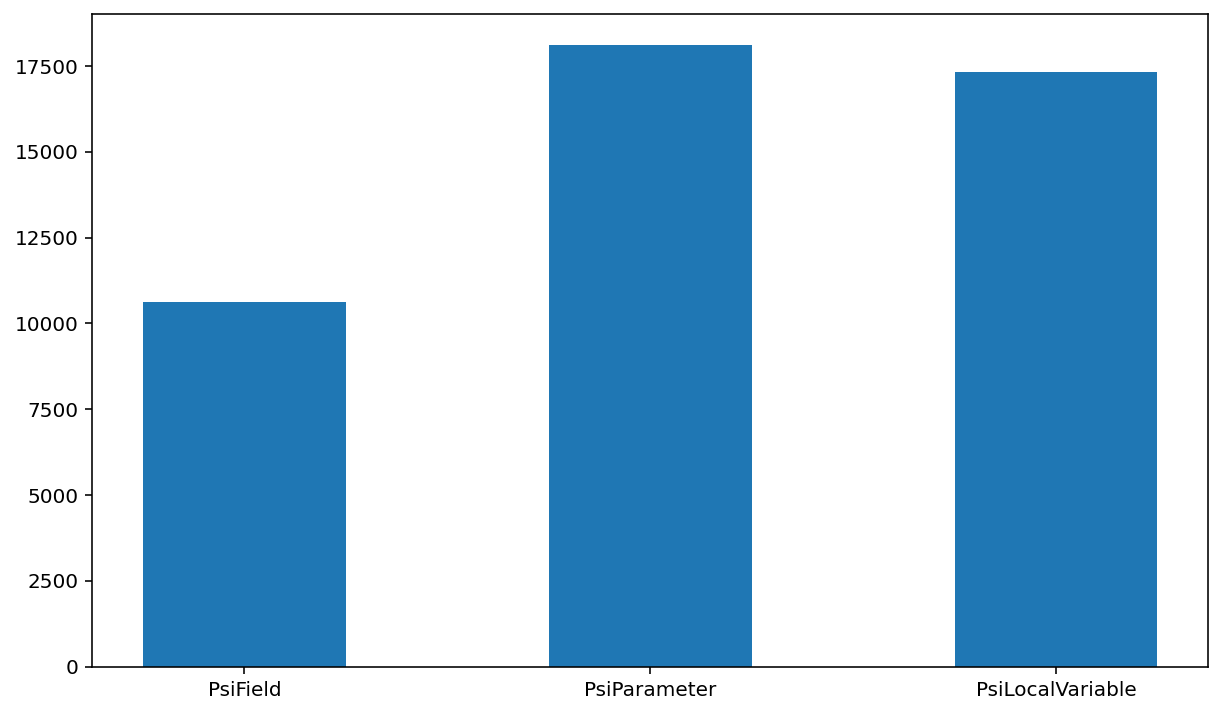

In [82]:
plt.subplots(figsize=(10, 6))
counts = plt.hist(variable_stats, bins=3, range=(0,3), rwidth=0.5, align='left')[0]

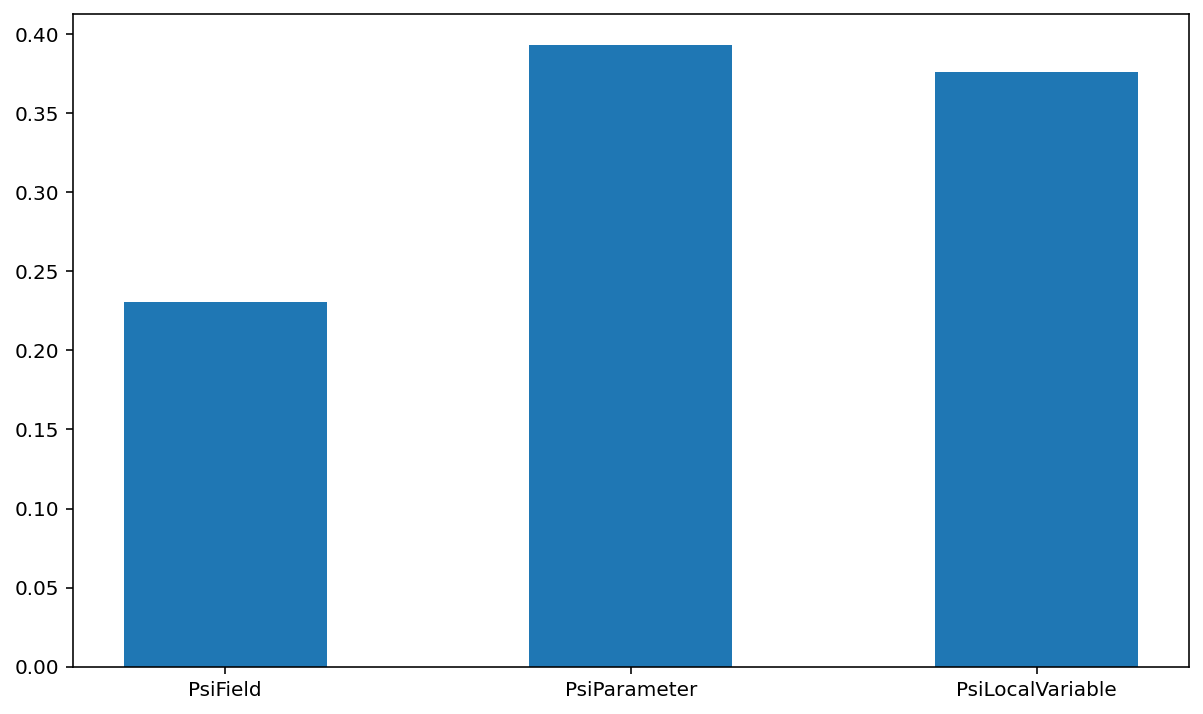

In [83]:
plt.subplots(figsize=(10, 6))
plt.hist(variable_stats, bins=3, range=(0,3), rwidth=0.5, align='left', density=True)
plt.show()

## Распределение количества использований у переменной

Среднее количество использований: 4.029005644811116
Медиана: 3.0


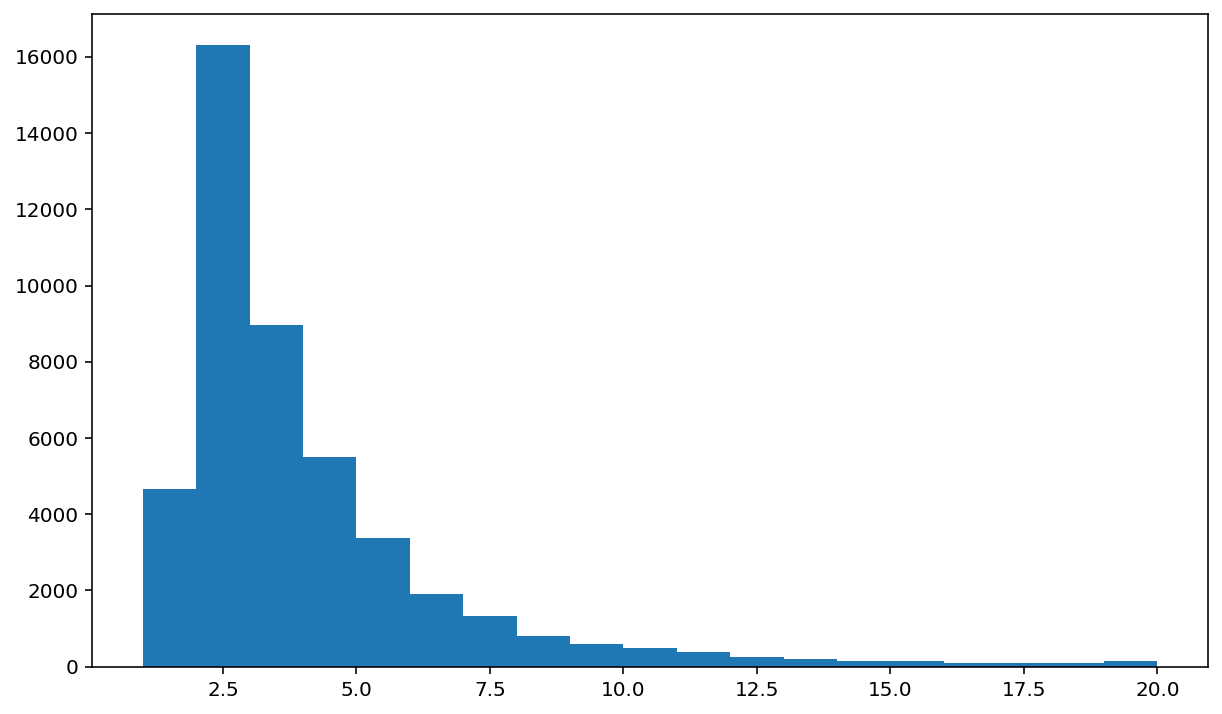

In [84]:
plt.subplots(figsize=(10, 6))
plt.hist(usage_counts, 19, range=(1,20))
print('Среднее количество использований:', np.mean(usage_counts))
print('Медиана:', np.median(usage_counts))

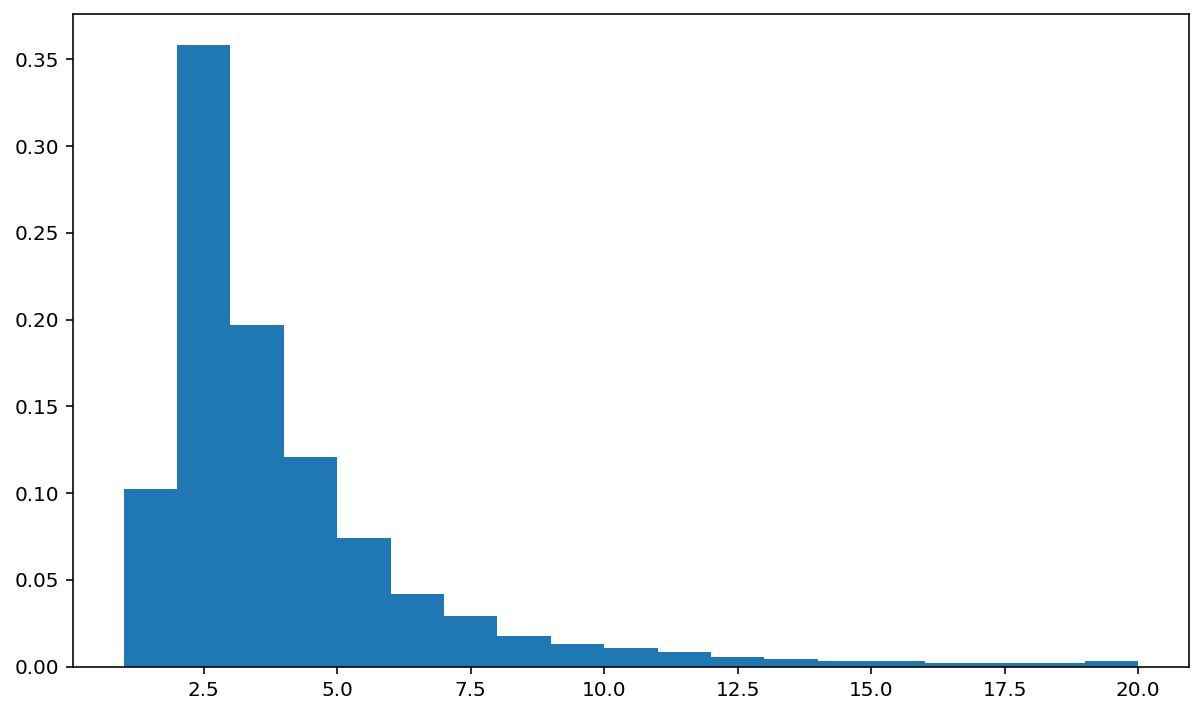

In [85]:
plt.subplots(figsize=(10, 6))
plt.hist(usage_counts, 19, range=(1,20), density=True)
plt.show()

## Распределение размеров файлов

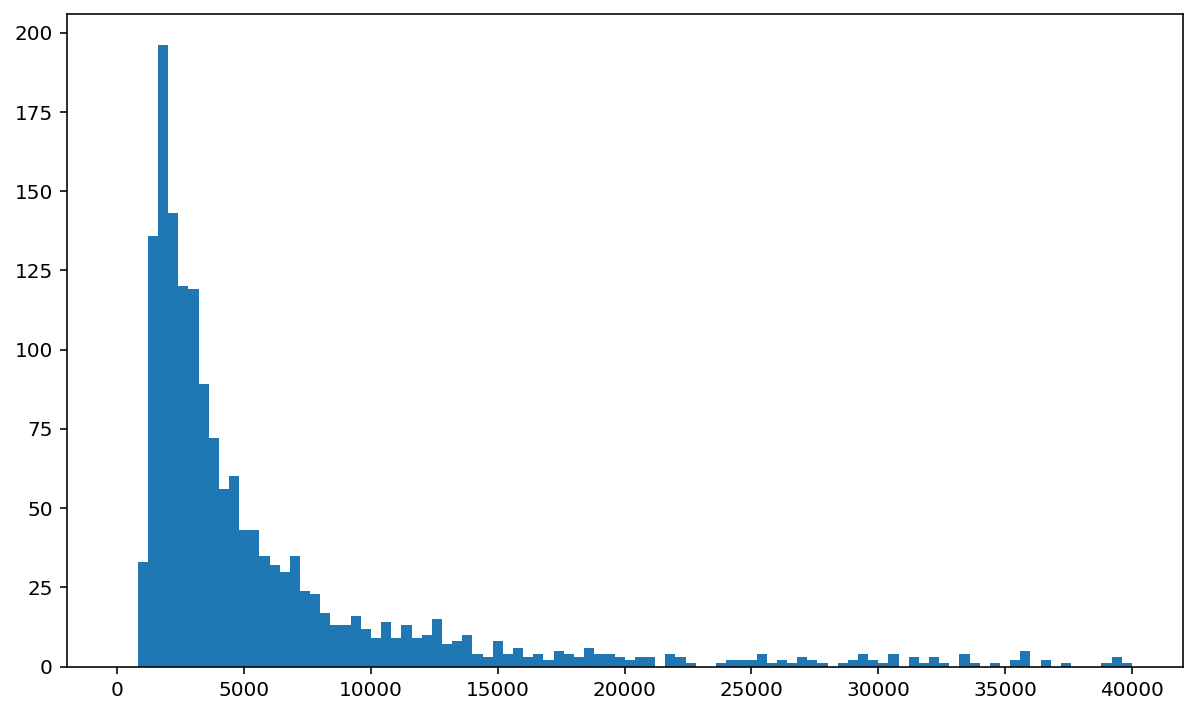

In [86]:
file_sizes = list(file_stats.values())
plt.subplots(figsize=(10, 6))
plt.hist(file_sizes, bins=100, range=(0, 4e4))
plt.show()

In [87]:
print('Средняя длина файлов:', np.mean(file_sizes))

Средняя длина файлов: 7419.671714112659


## Распределение количества переменных в файле

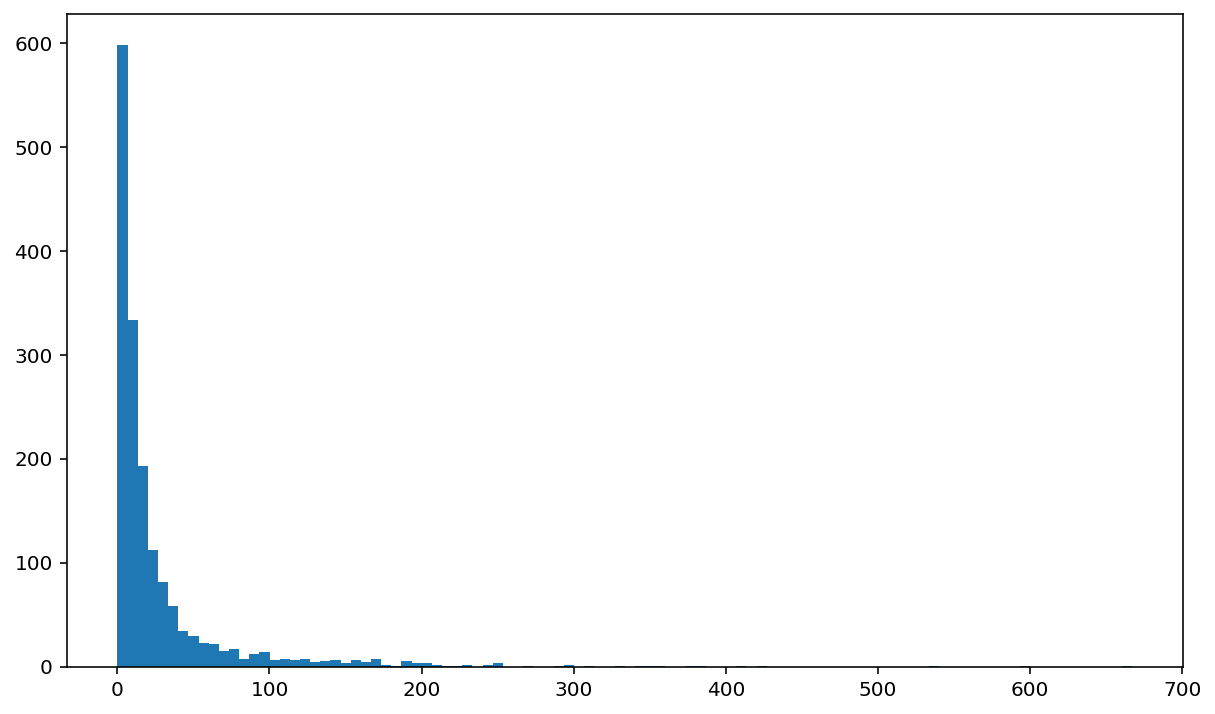

In [88]:
plt.subplots(figsize=(10, 6))
plt.hist(file_var_counts, bins=100, range=None)
plt.show()

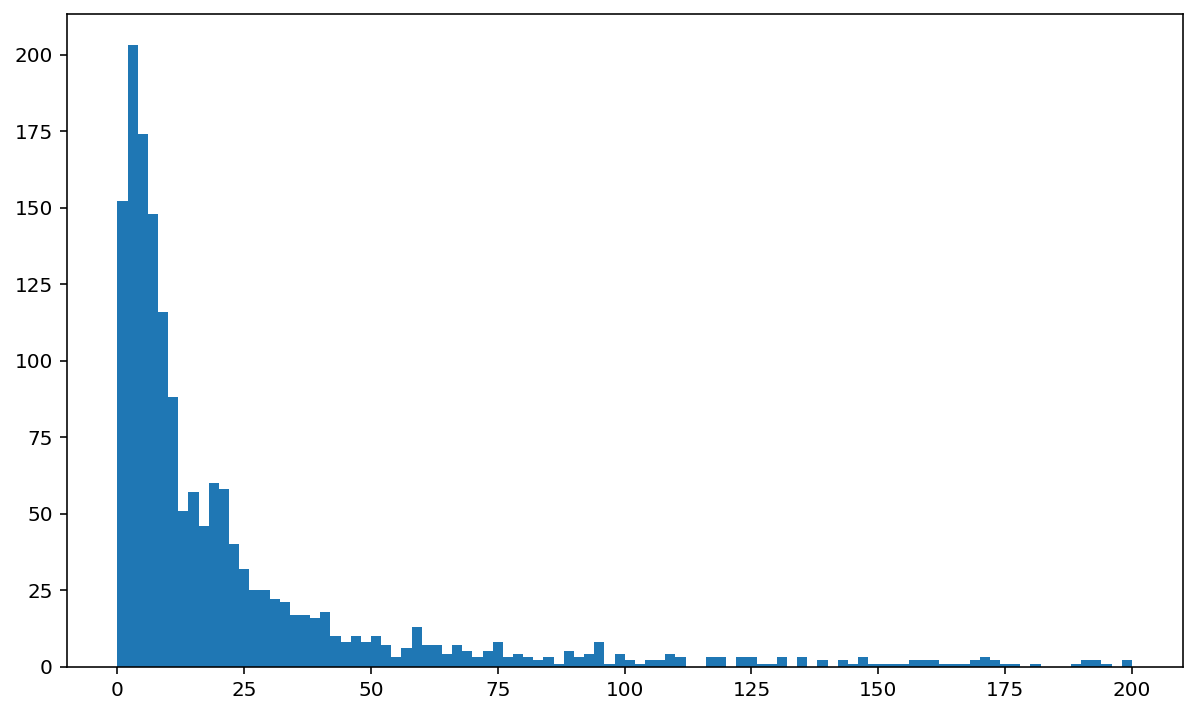

In [94]:
plt.subplots(figsize=(10, 6))
plt.hist(file_var_counts, bins=100, range=(0, 200))
plt.show()